In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

In [2]:
covid_1 =pd.read_csv("/Users/arkajiad/Downloads/Covid Vaccine Datasets only/covid19vaccinesbycounty.csv")

/Users/arkajiad/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='jj_doses', ylabel='Density'>

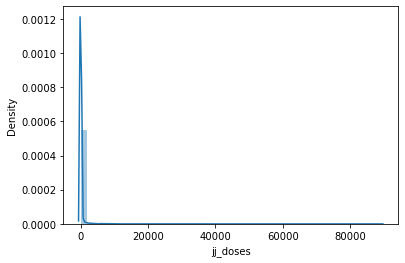

In [5]:
sns.distplot(covid_1['jj_doses'])

/Users/arkajiad/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pfizer_doses', ylabel='Density'>

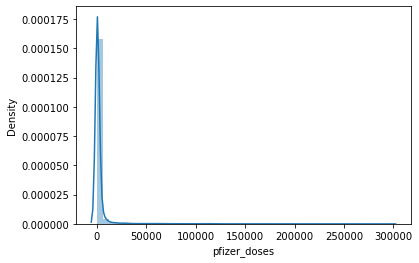

In [6]:
sns.distplot(covid_1['pfizer_doses'])

/Users/arkajiad/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='moderna_doses', ylabel='Density'>

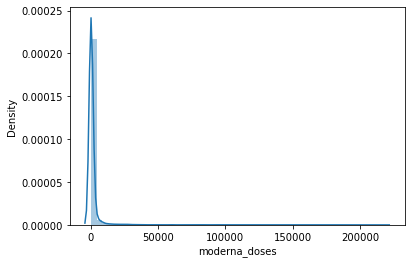

In [7]:
sns.distplot(covid_1['moderna_doses'])

In [9]:
x = covid_1['jj_doses']
y = covid_1['moderna_doses']

In [10]:
c1 = sm.OLS(y,x).fit()

In [11]:
pred_val = c1.fittedvalues.copy()
true_val = covid_1['jj_doses'].values.copy()
residual = true_val - pred_val

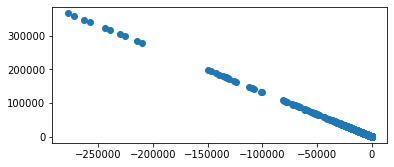

In [12]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, pred_val)

In [13]:
sms.diagnostic.het_breuschpagan(residual, covid_1[['moderna_doses']])

(4529.313321019338, nan, 5097.7656353870325, 0.0)

In [17]:
covid_1.corr()

,total_doses,cumulative_total_doses,pfizer_doses,cumulative_pfizer_doses,moderna_doses,cumulative_moderna_doses,jj_doses,cumulative_jj_doses,partially_vaccinated,total_partially_vaccinated,fully_vaccinated,cumulative_fully_vaccinated,at_least_one_dose,cumulative_at_least_one_dose,booster_recip_count,cumulative_booster_recip_count
total_doses,1.000000,0.570230,0.986236,0.560773,0.977990,0.597313,0.635482,0.560672,0.924169,0.873980,0.917198,0.574113,0.925272,0.623948,0.477461,0.278529
cumulative_total_doses,0.570230,1.000000,0.592469,0.999678,0.482192,0.998796,0.272706,0.995306,0.355759,0.832160,0.402135,0.994830,0.355210,0.993033,0.619513,0.819891
pfizer_doses,0.986236,0.592469,1.000000,0.582799,0.939733,0.621308,0.611704,0.588694,0.909924,0.890992,0.934163,0.603228,0.910114,0.652062,0.431224,0.261159
cumulative_pfizer_doses,0.560773,0.999678,0.582799,1.000000,0.472552,0.997613,0.264105,0.995646,0.343966,0.823338,0.388202,0.995317,0.343193,0.992327,0.627191,0.818825
moderna_doses,0.977990,0.482192,0.939733,0.472552,1.000000,0.508191,0.576879,0.464106,0.937805,0.815708,0.884042,0.478161,0.931119,0.531011,0.435349,0.242394
cumulative_moderna_doses,0.597313,0.998796,0.621308,0.997613,0.508191,1.000000,0.295556,0.994955,0.387490,0.852985,0.438166,0.995593,0.387379,0.996403,0.609507,0.800285
jj_doses,0.635482,0.272706,0.611704,0.264105,0.576879,0.295556,1.000000,0.272278,0.608872,0.530374,0.667377,0.279210,0.679906,0.317055,0.161494,0.065984
cumulative_jj_doses,0.560672,0.995306,0.588694,0.995646,0.464106,0.994955,0.272278,1.000000,0.337864,0.821078,0.398911,0.997987,0.338502,0.994412,0.626162,0.779585
partially_vaccinated,0.924169,0.355759,0.909924,0.343966,0.937805,0.387490,0.608872,0.337864,1.000000,0.771467,0.893765,0.357285,0.995605,0.417700,0.180877,0.088665
total_partially_vaccinated,0.873980,0.832160,0.890992,0.823338,0.815708,0.852985,0.530374,0.821078,0.771467,1.000000,0.793859,0.830376,0.772230,0.868335,0.443719,0.549407


<AxesSubplot:>

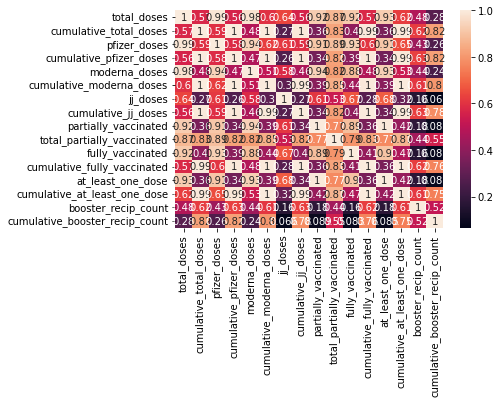

In [18]:
sns.heatmap(covid_1.corr(), annot=True)

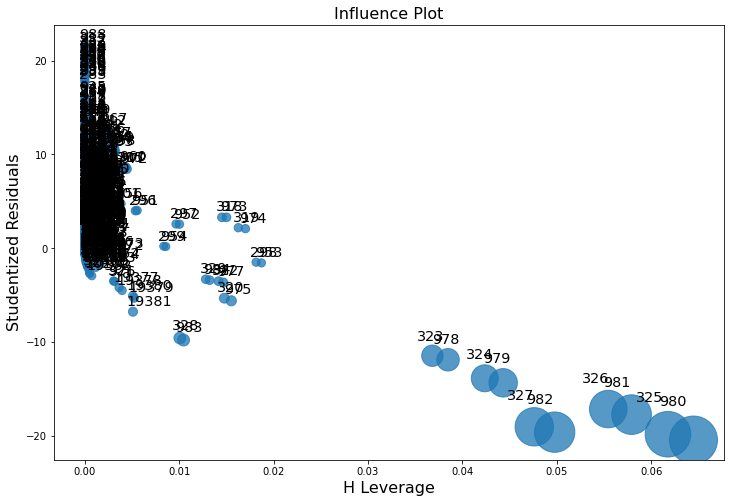

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(c1, alpha = .05, ax = ax, criterion="cooks")

In [23]:
c1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          moderna_doses   R-squared (uncentered):                   0.339
Model:                            OLS   Adj. R-squared (uncentered):              0.339
Method:                 Least Squares   F-statistic:                          2.083e+04
Date:                Fri, 17 Jun 2022   Prob (F-statistic):                        0.00
Time:                        19:41:09   Log-Likelihood:                     -4.3168e+05
No. Observations:               40610   AIC:                                  8.634e+05
Df Residuals:                   40609   BIC:                                  8.634e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
jj_doses       4.1174      0.029    144.341      0.000       4.062       4.173
==============================================================================
Omnibus:                    62735.285   Durbin-Watson:                   0.177
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         55154700.693
Skew:                           9.622   Prob(JB):                         0.00
Kurtosis:                     182.514   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""